# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [104]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import umap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score




import warnings
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [169]:
data = pd.read_csv(
    "/content/data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [170]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [172]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [175]:
nan_rows = data.isna().sum()/len(data)
print(f'Процент пропусков в каждом столбце:\n {nan_rows}')
data = data.dropna(subset='CustomerID')
data.info()

Процент пропусков в каждом столбце:
 InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [174]:
duplicates = data[data.duplicated(subset=data.columns)]
data = data.drop_duplicates()
print(duplicates.shape[0])

5225


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [176]:
negative_quantity = data[(data['Quantity']<0)]
negative_quantity['InvoiceNo'].apply(lambda x: 'C' not in x).sum()
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [177]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [178]:
num_missing_contragents = data['QuantityCanceled'].isna().sum()
print(f'Количество транзакций без контрагентов: {num_missing_contragents}')

data = data.dropna(subset=['QuantityCanceled'])
data.shape

Количество транзакций без контрагентов: 1303


(400301, 9)

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [180]:
special_transactions = data[data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)]
print(f"Специальные транзакции, начинающиеся со слов: {special_transactions['StockCode'].unique()}")
data = data[~data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)]
print(data.shape)


Специальные транзакции, начинающиеся со слов: ['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
(398628, 9)


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [181]:
data = data[data['UnitPrice']>0]
data.shape

(398628, 9)

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [182]:
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])
data.shape

(398628, 10)

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [183]:
country_data = data.groupby(by=['Country'], as_index=False)['TotalPrice'].agg({'sum', 'count'}).sort_values(by = 'count')
country_data

,Country,sum,count
28,Saudi Arabia,116.42,10
2,Bahrain,548.40,17
8,Czech Republic,614.21,28
4,Brazil,1143.60,32
21,Lithuania,1661.06,35
20,Lebanon,1693.88,45
27,RSA,1002.31,57
11,European Community,1142.25,58
34,United Arab Emirates,1864.78,67
22,Malta,1921.16,123


*Мы видим, что бОльшая часть данных содержит информацию о покупках, совершенных в Великобритании - сумма транзакций и их количество значительно превышают другие значения (~90% транзакций относятся к Великобритании, ~10% - это остальные страны.)*

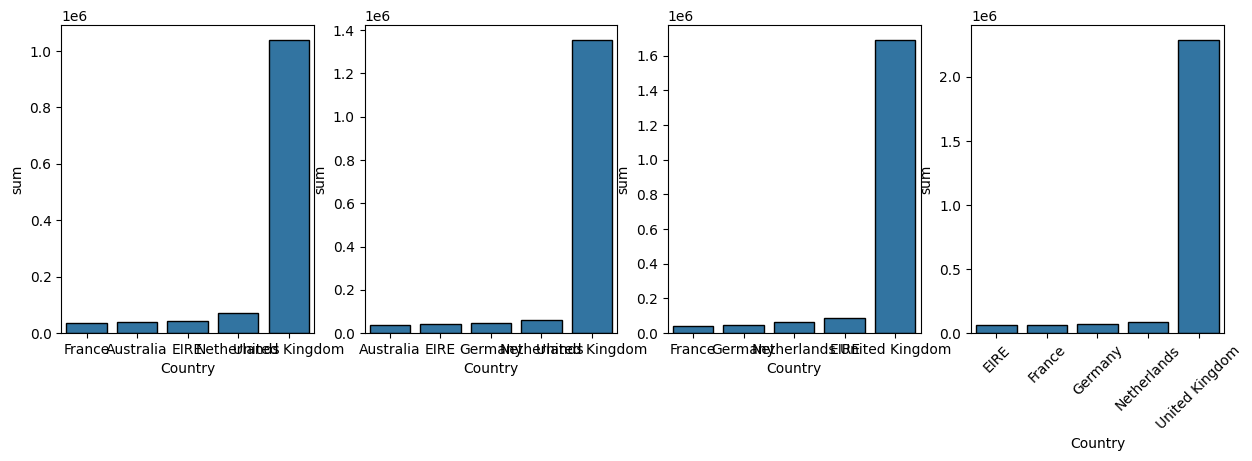

In [185]:
data['quarter'] = data['InvoiceDate'].dt.quarter
quarter_data = data.groupby(by=['quarter', 'Country'], as_index=False)['TotalPrice'].agg({'sum'}).sort_values(by = 'sum').reset_index()
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
for i in range(1,5):
    s = quarter_data[quarter_data['quarter'] == i].tail(5)
    sns.barplot(s, x = 'Country', y = 'sum', ax = axes[i-1])
    plt.xticks(rotation=45)

*Графики также показывают, что в каждом сезоне в топе - Великобритания*

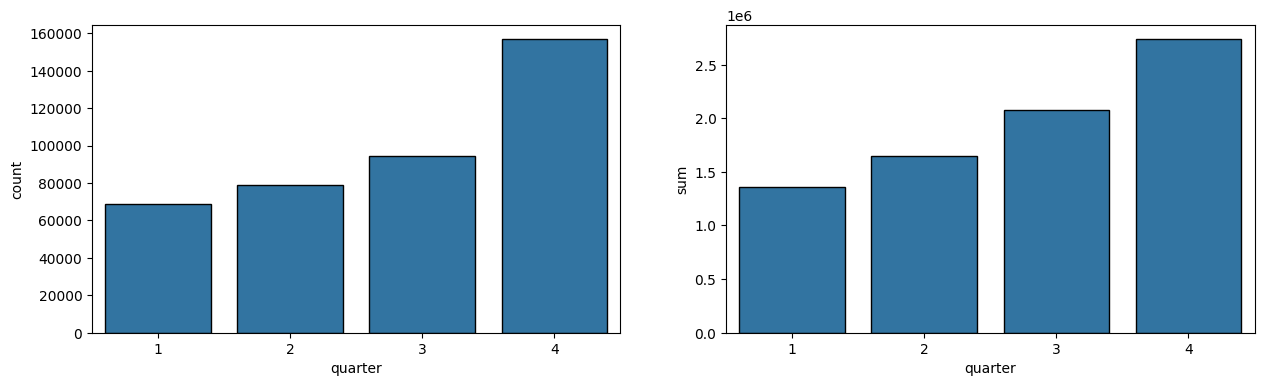

In [186]:
quarter_data = data.groupby(by=['quarter'])['TotalPrice'].agg({'sum', 'count'}).sort_values(by = 'sum').reset_index()
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig1 = sns.barplot(data = quarter_data, x = 'quarter', y = 'count',  ax=axes[0])
fig2 = sns.barplot(data = quarter_data, x = 'quarter', y = 'sum', ax = axes[1])

*Обычно, самый "горячий" сезон для покупок - четвертый квартал, т.к. идёт подготовка к новогодним праздникам и многие покупают подарки. Самый низкий сезон - начало года, охлаждение после высокого сезона. В 2 и 3 квартале значения растут.*

In [187]:
data = data.drop('quarter', axis=1)

Text(0.5, 1.0, 'Распределение среднего числа заказов по часам')

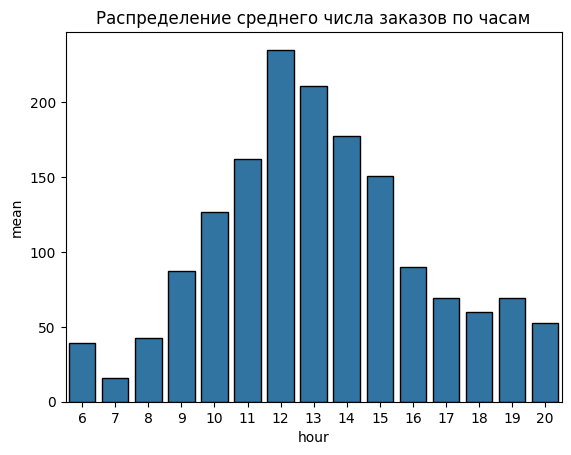

In [188]:
data['hour'] = data['InvoiceDate'].dt.hour
data['date'] = data['InvoiceDate'].dt.date
daily_data = data.groupby(by = ['date', 'hour'])['TotalPrice'].agg({'count'}).sort_values(by = 'count').reset_index()
grouped_daily_data = daily_data.groupby(by = ['hour'])['count'].agg({'mean'}).sort_values(by = 'mean').reset_index()
f = sns.barplot(data = grouped_daily_data, x = 'hour', y = 'mean')
f.set_title('Распределение среднего числа заказов по часам')

*По диаграмме видно, что пик числа покупок - с 10:00 до 15:00. Ранним утром и вечером наблюдается снижение покупательской активности.*

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
  $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

  где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

   В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [189]:
t0 = pd.Timestamp("2011-12-10 00:00:00")
rfm_table = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (t0 - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm_table.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm_table.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           325          2 -77183.60
12347             2          7   4310.00
12348            75          4   1437.24
12349            18          1   1457.55
12350           310          1    294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [191]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [192]:
freq_threshold = rfm_table['Frequency'].quantile(0.95)
monetary_threshold = rfm_table['Monetary'].quantile(0.95)

rfm_filtered = rfm_table[
    (rfm_table['Frequency'] <= freq_threshold) &
    (rfm_table['Monetary'] > 0) &
    (rfm_table['Monetary'] <= monetary_threshold)
]
rfm_filtered.shape

(4036, 3)

In [193]:
boxes = [px.box(rfm_filtered, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


Оптимальное число кластеров (PCA): 3
KMeans Silhouette Score (PCA): 0.6682169407919647
Agglomerative Silhouette Score (PCA): 0.6682169407919647
DBSCAN Silhouette Score (PCA): 0.6485551369092083


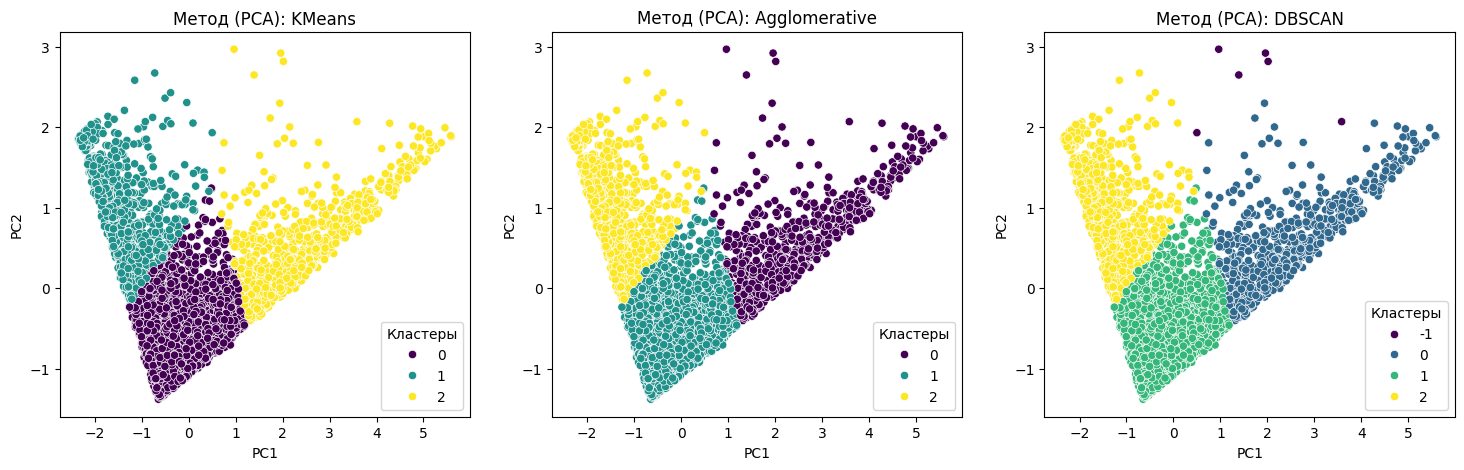

In [194]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered)

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'], index=rfm_filtered.index)

cluster_range = range(3, 11)
silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_pca_df)
    score = silhouette_score(rfm_pca_df, cluster_labels)
    silhouette_scores[n_clusters] = score

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров (PCA): {best_n_clusters}')

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_pca_df['KMeans'] = kmeans.fit_predict(rfm_pca_df)
rfm_pca_df['Agglomerative'] = agglomerative.fit_predict(rfm_pca_df)
rfm_pca_df['DBSCAN'] = dbscan.fit_predict(rfm_pca_df)

print(f"KMeans Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['KMeans'])}")
print(f"Agglomerative Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['Agglomerative'])}")

if len(set(rfm_pca_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score (PCA): Невозможно вычислить (все точки в одном кластере)")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='PC1', y='PC2', hue=method, data=rfm_pca_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод (PCA): {method}')
    axes[i].legend(title='Кластеры')

plt.show()

Оптимальное число кластеров (t-SNE): 10
KMeans Silhouette Score (t-SNE): 0.43357971656711075
Agglomerative Silhouette Score (t-SNE): 0.41100769075632054
DBSCAN Silhouette Score (t-SNE): -0.5681451375132328


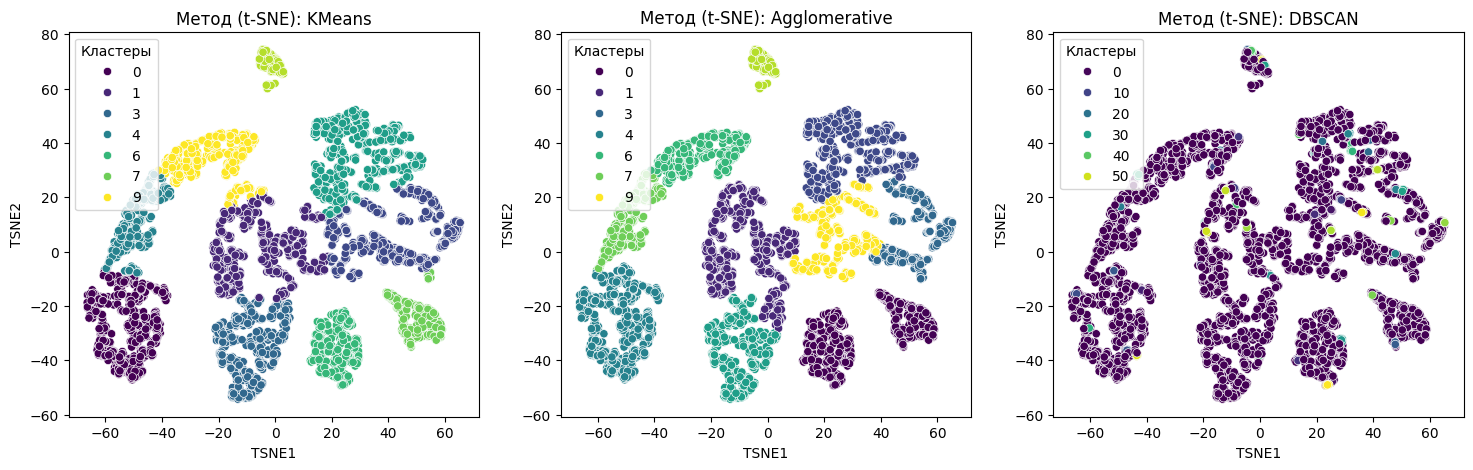

In [195]:
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)
rfm_tsne_df = pd.DataFrame(rfm_tsne, columns=['TSNE1', 'TSNE2'], index=rfm_filtered.index)

silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_tsne_df)
    score = silhouette_score(rfm_tsne_df, cluster_labels)
    silhouette_scores[n_clusters] = score

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров (t-SNE): {best_n_clusters}')

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_tsne_df['KMeans'] = kmeans.fit_predict(rfm_tsne_df)
rfm_tsne_df['Agglomerative'] = agglomerative.fit_predict(rfm_tsne_df)
rfm_tsne_df['DBSCAN'] = dbscan.fit_predict(rfm_tsne_df)

print(f"KMeans Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['KMeans'])}")
print(f"Agglomerative Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['Agglomerative'])}")

if len(set(rfm_tsne_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score (t-SNE): Невозможно вычислить (все точки в одном кластере)")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='TSNE1', y='TSNE2', hue=method, data=rfm_tsne_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод (t-SNE): {method}')
    axes[i].legend(title='Кластеры')

plt.show()

Оптимальное число кластеров: 8
KMeans Silhouette Score: 0.6737815234880641
Agglomerative Silhouette Score: 0.6673511193542042
DBSCAN Silhouette Score: 0.7068624172185781


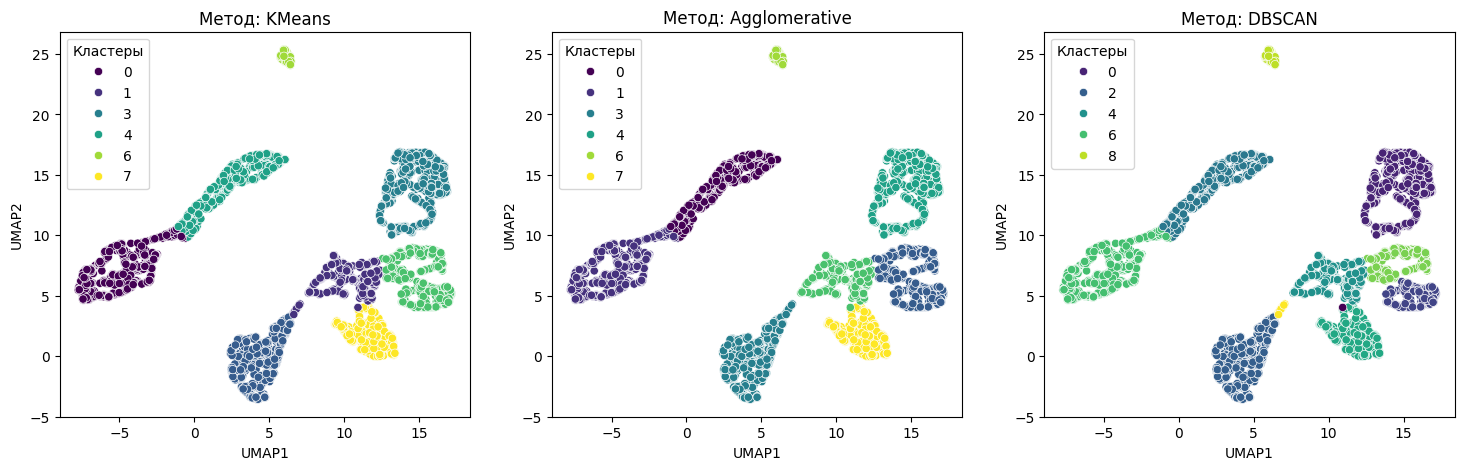

In [197]:
# Стандартизация данных
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered)

# Применяем UMAP для уменьшения размерности до 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
rfm_umap = umap_model.fit_transform(rfm_scaled)

# Преобразуем в DataFrame
rfm_umap_df = pd.DataFrame(rfm_umap, columns=['UMAP1', 'UMAP2'], index=rfm_filtered.index)

# Подбор оптимального количества кластеров
cluster_range = range(3, 11)
silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_umap_df)
    score = silhouette_score(rfm_umap_df, cluster_labels)
    silhouette_scores[n_clusters] = score

# Оптимальное количество кластеров
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров: {best_n_clusters}')

# Применяем 3 метода кластеризации
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_umap_df['KMeans'] = kmeans.fit_predict(rfm_umap_df)
rfm_umap_df['Agglomerative'] = agglomerative.fit_predict(rfm_umap_df)
rfm_umap_df['DBSCAN'] = dbscan.fit_predict(rfm_umap_df)

# Вычисляем и выводим силуэтные коэффициенты для каждого метода
print(f"KMeans Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['KMeans'])}")
print(f"Agglomerative Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['Agglomerative'])}")

# Для DBSCAN может не быть силуэтного коэффициента (из-за выбросов, помеченных как -1)
if len(set(rfm_umap_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score: Невозможно вычислить (все точки в одном кластере)")

# Визуализация кластеров
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='UMAP1', y='UMAP2', hue=method, data=rfm_umap_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод: {method}')
    axes[i].legend(title='Кластеры')

plt.show()


Были проведены PCA, tSNe, umap, каждый отдельный метод был применен к трем видам класстеризации:
1. Kmeans
2. Agglomerative
3. DBSCAN    

В итоге, алгоритм с наибольшим коэффициентом силуэта = 0.7069 показал     
алгоритм **DBSCAN** c оптимальным количеством кластеров = 8
совместно с методом понижение размерности **umap**.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [198]:
fig = px.scatter_3d(
    rfm_filtered,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color =rfm_umap_df['DBSCAN'].astype(str),
    title="Кластеры клиентов (RFM-анализ)",
    labels={'color': 'Кластер'}
)

fig.show()


1. Кластер 0 - клиенты с самой низкой частотой, низкой денежной ценностью, но не так давно совершившие покупку. Скорее всего это те клиенты, которые приобретали товар разово (или в первый раз).
2. Кластер 1 – клиенты с самыми лучшими показателями. Это лояльные клиенты, которые часто совершают покупки, чем приносят большую прибыль.
3. Кластер 2 – клиенты, давно не совершавшие покупок. Эти люди в зоне риска.
4. Кластер 3 – клиенты с высокой доходностью и средней частотностью, но покупавшие давно. Это лояльные когда-то клиенты, которые по какой-то причине перестали совершать покупки. В зоне потери.
5. Кластер 4 - клиенты, с низкой доходностью и частотой. Но самое важное -  они совершали покупки очень давно.
6. Кластер 5 - клиенты с средней частотой и доходностью, но совершившие покупку недавно либо 3 месяца назад. В зоне риска
7. Кластер 6 – клиенты с самой низкой активностью. Скорее всего - это уже ушедшие клиенты.
8. Кластер 7 – клиенты со средней частотой покупок и ценностью  чуть выше среднего, недавно совершившие покупку. Это перспективные клиенты.
9. Кластер 8 – редкие покупатели с небольшими тратами. Возможно, это клиенты, которых стоит привлечь с помощью маркетинговых акций.
10. Кластер 9 – пользователи совершившие покупку максимум 2 месяца назад, со средней частотой и низкой монетаризацией. Это могут быть новые клиенты или разовые покупатели.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [199]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [201]:
rfm_filtered['Cluster'] = rfm_umap_df['DBSCAN']
grouped_data = rfm_filtered.groupby('Cluster').mean()
plot_cluster_profile(grouped_data= grouped_data, n_clusters=10)


1. Кластер 0 - Вероятно, приобретали товар "на пробу".
2. Кластер 1 – Лояльны, часто покупают и приносят большую прибыль.
3. Кластер 2 - Клиенты в зоне риска со средним доходом. Необходимо смотивировать их к покупкам с помощью маркетинговых акций (возможно увеличив при этом их средний чек).
4. Кластер 3 – Лояльные клиенты, с хорошей доходностью, но давно не совершавшие покупок. Необходимо выяснить по какой причине они перестали приобретать товары.
5. Кластер 4 - Клиенты с малой заинтересованностью, давно не совершавшие покупок. Необходимо проверить % таких людей от общего количества клиентов и если процент небольшой, можно оставить без внимания.
6. Кластер 5 - Клиенты в зоне риска. Необходимо попробовать чаще рассылать выгодные предложения, (в идеале - повысить средний чек).
7. Кластер 6 – Вероятно это уже неактивные клиенты.
8. Кластер 7 - Это перспективные клиенты. Нужно присылать им новые предложения.
9. Кластер 8 – Редкие клиенты - ценность небольшая. Эту категорию клиентов можно попробовать завлечь предложениями или промоакциями.
10. Кластер 9 - Необходимо проследить за этими клиентами. Они могут перейти как в перспективные так и в ушедшие.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Выводы о проделанной работе:       
Была поставлена задача разделить клиентов на сегменты по покупательской способности.

Для решения данного проекта был выбран метод RFM, который заключается в группировке клиентов на основе следующих параметров:

- Recency (Давность) — давность последней покупки клиента.
- Frequency (Частота) — общее количество покупок клиента.
- Monetary (Денежная ценность) — сколько денег потратил клиент.     


Проделанная работа:     
Перед формированием кластеров были выполнены следующие этапы:  

1. Предварительная очистка данных (поиск пропусков, дубликатов и т. д.).
2. Разведывательный анализ данных: выявлены основные закономерности, сформированы новые признаки, устранены зависимые данные, построены графики для лучшего понимания клиентов и их потребностей.
3. Стандартизация, снижение размерности и удаление выбросов для подготовки данных к кластеризации.     

Применены три метода кластеризации и получены итоговые сегменты клиентов.
Результаты кластеризации    
В результате проделанной работы были выделены следующие сегменты клиентов:


1. Кластер 0 - клиенты с самой низкой частотой, низкой денежной ценностью, но не так давно совершившие покупку. Скорее всего это те клиенты, которые приобретали товар разово (или в первый раз).
2. Кластер 1 – клиенты с самыми лучшими показателями. Это лояльные клиенты, которые часто совершают покупки, чем приносят большую прибыль.
3. Кластер 2 – клиенты, давно не совершавшие покупок. Эти люди в зоне риска.
4. Кластер 3 – клиенты с высокой доходностью и средней частотностью, но покупавшие давно. Это лояльные когда-то клиенты, которые по какой-то причине перестали совершать покупки. В зоне потери.
5. Кластер 4 - клиенты, с низкой доходностью и частотой. Но самое важное -  они совершали покупки очень давно.
6. Кластер 5 - клиенты с средней частотой и доходностью, но совершившие покупку недавно либо 3 месяца назад. В зоне риска
7. Кластер 6 – клиенты с самой низкой активностью. Скорее всего - это уже ушедшие клиенты.
8. Кластер 7 – клиенты со средней частотой покупок и ценностью  чуть выше среднего, недавно совершившие покупку. Это перспективные клиенты.
9. Кластер 8 – редкие покупатели с небольшими тратами. Возможно, это клиенты, которых стоит привлечь с помощью маркетинговых акций.
10. Кластер 9 – пользователи совершившие покупку максимум 2 месяца назад, со средней частотой и низкой монетаризацией. Это могут быть новые клиенты или разовые покупатели.